In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

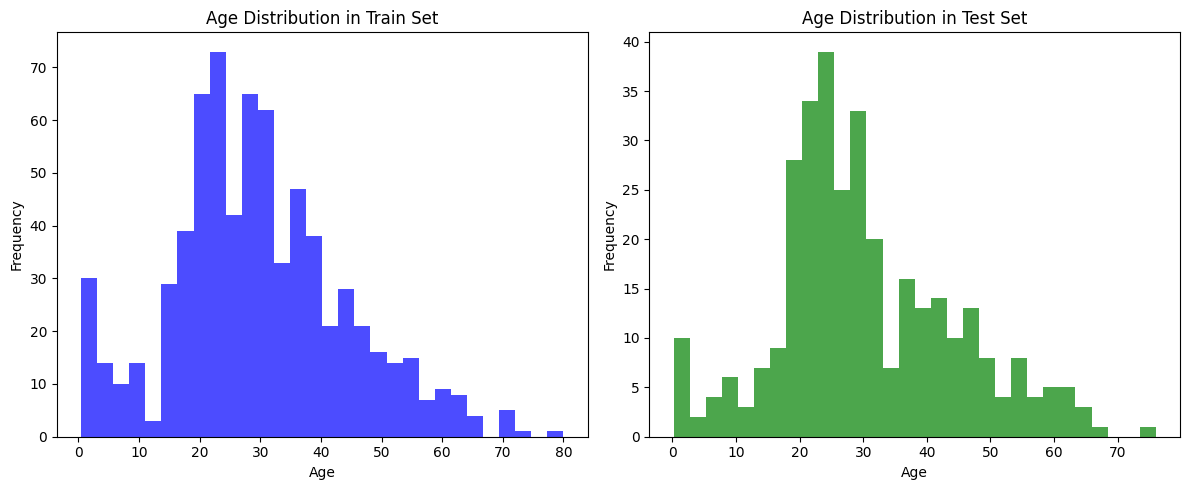

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram for train['Age']
axes[0].hist(train['Age'], bins=30, color='blue', alpha=0.7)
axes[0].set_title('Age Distribution in Train Set')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot histogram for test['Age']
axes[1].hist(test['Age'], bins=30, color='green', alpha=0.7)
axes[1].set_title('Age Distribution in Test Set')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
def clean_data(df):
    """
    Hàm tiền xử lý dữ liệu Titanic:
    - Chuyển cột Sex về dạng 0/1
    - Điền median cho cột Age và Fare
    """
    df = df.copy()

    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    
    return df

In [10]:
train_cleaned = clean_data(train)
test_cleaned = clean_data(test)

train_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [11]:
train_cleaned.dropna(subset=['Embarked'], inplace=True)

In [12]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Parch', 'SibSp']

X_train = train_cleaned[features]
y_train = train_cleaned['Survived']

X_test = test_cleaned[features]

In [13]:
X_train

,Pclass,Sex,Age,Fare,Parch,SibSp
0,3,0,22.0,7.2500,0,1
1,1,1,38.0,71.2833,0,1
2,3,1,26.0,7.9250,0,0
3,1,1,35.0,53.1000,0,1
4,3,0,35.0,8.0500,0,0
...,...,...,...,...,...,...
886,2,0,27.0,13.0000,0,0
887,1,1,19.0,30.0000,0,0
888,3,1,28.0,23.4500,2,1
889,1,0,26.0,30.0000,0,0


In [14]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(col: pd.Series, whisker_coeff: float = 1.5) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [15]:
X_train['Parch'].value_counts()

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [16]:
outlier_features = []

numeric_features = ['Age', 'Fare']

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Parch', 'SibSp']

for column in numeric_features:
    clipper = BoxplotOutlierClipper()
    clipper.fit(X_train[column])
    lower, upper = clipper.lower, clipper.upper
    if X_train[(X_train[column] < lower) | (X_train[column] > upper)].shape[0] > 0:
        outlier_features.append(column)
        print(f"Outliers detected in {column} column. Lower bound: {lower}, Upper bound: {upper}")

print("Features with outliers:", outlier_features)

Outliers detected in Age column. Lower bound: 2.5, Upper bound: 54.5
Outliers detected in Fare column. Lower bound: -26.7605, Upper bound: 65.6563
Features with outliers: ['Age', 'Fare']


In [17]:
def create_submission(model, X_test, filename):
    predictions = model.predict(X_test)
    output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
    output.to_csv(filename, index=False)
    print("Your submission was successfully saved!")

## **KNN**

In [18]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = X_test.copy()
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

In [20]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
    'p': [1, 2, 3, 4],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [24]:
model = grid_search.best_estimator_

In [25]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [26]:
accuracy_score(y_train, model.predict(X_train_scaled))

0.8717660292463442

In [27]:
confusion_matrix(y_train, model.predict(X_train_scaled))

array([[497,  52],
       [ 62, 278]])

In [28]:
create_submission(model, X_test_scaled, 'submission_knn.csv')

Your submission was successfully saved!


## **Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
accuracy_score(y_train, model.predict(X_train))

0.9797525309336333

In [41]:
confusion_matrix(y_train, model.predict(X_train))

array([[547,   2],
       [ 16, 324]])

In [45]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([0.74157303, 0.78089888, 0.80898876, 0.76404494, 0.81920904])

## **Logistic Regression**

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_train_pred)

0.7952755905511811

In [56]:
y_pred = model.predict(X_test_scaled)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'], 
    'Survived': y_pred
})
submission.to_csv('submission.csv', index=False)

## **Random Forest**

In [18]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

skf = StratifiedKFold(n_splits=5)

In [83]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

space = {
    'n_estimators': hp.choice('n_estimators', range(100, 500)),
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 10)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 20))
}

def objective(params):
    model = RandomForestClassifier(**params)
    acc = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy').mean()
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)
best

100%|██████████| 100/100 [02:38<00:00,  1.58s/trial, best loss: -0.8335428172411603]


{'max_depth': np.int64(15),
 'min_samples_leaf': np.int64(2),
 'min_samples_split': np.int64(2),
 'n_estimators': np.int64(357)}

In [84]:
model = RandomForestClassifier(**best)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=np.int64(15), min_samples_leaf=np.int64(2),
                       min_samples_split=np.int64(2),
                       n_estimators=np.int64(357))

In [85]:
accuracy_score(y_train, model.predict(X_train))

0.9133858267716536

In [86]:
confusion_matrix(y_train, model.predict(X_train))

array([[522,  27],
       [ 50, 290]])

In [87]:
create_submission(model, X_test, 'submission_rf.csv')

Your submission was successfully saved!


## **SVM**

In [68]:
from sklearn.svm import SVC

param_grid = {
    'C': [9.5, 10, 10.5],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'sigmoid']
}
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [9.5, 10, 10.5], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [69]:
best_model = grid_search.best_estimator_
best_model

SVC(C=10)

In [70]:

print(accuracy_score(y_train, best_model.predict(X_train_scaled)))

0.8368953880764904


In [71]:
confusion_matrix(y_train, best_model.predict(X_train_scaled))

array([[498,  51],
       [ 94, 246]])

In [72]:
create_submission(best_model, X_test_scaled, 'submission_svc.csv')

Your submission was successfully saved!


## **Naive Bayes**

In [63]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [64]:
accuracy_score(y_train, model.predict(X_train))

0.7930258717660292

In [65]:
confusion_matrix(y_train, model.predict(X_train))

array([[465,  84],
       [100, 240]])

In [ ]:
create_submission(model, X_test, 'submission_naive_bayes.csv')

## **AdaBoost**

In [29]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

In [30]:
accuracy_score(y_train, model.predict(X_train))

0.8211473565804275

In [31]:
create_submission(model, X_test, 'submission_ada.csv')

Your submission was successfully saved!


In [38]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.random.randint(50, 200, 100),
    'learning_rate': np.random.uniform(0.8, 2, 100)
}

ada = AdaBoostClassifier()
skf = StratifiedKFold(n_splits=5)
random_search = RandomizedSearchCV(ada, param_distributions=param_dist, n_iter=100, cv=skf, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': array([1.51359991, 1.65504233, 0.96765861, 1.6381396 , 1.2840876 ,
       1.74630647, 1.85700422, 1.87961102, 1.22989698, 1.19186056,
       1.00892997, 1.75160565, 1.16822111, 1.06599036, 1.49427526,
       1.4563227...
                                        'n_estimators': array([ 53, 194,  51, 145, 115, 167, 160, 162,  83, 186, 135,  55, 132,
        53, 170, 110,  60,  96, 132,  83, 112, 100,  63,  67, 189,  94,
       161,  80,  56, 100,  79, 141, 140, 149, 194,  77, 186, 113, 101,
       111, 196, 136, 196,  96, 187, 134, 120, 177,  78, 133, 195,  72,
       122, 194, 117,  77,  92,  58,  59, 135, 159, 148, 115,  53, 153,
        76,  63,  92, 128, 182,  74,  62, 127,  69,  51, 154, 109, 179,
        55, 119,  54, 123,  54, 193, 108, 135, 159, 161, 158, 147,  74,
       179, 197, 158, 107,  71, 138, 138,  79, 157], dtype=int32)},
                   verbose=2)

In [39]:
random_search.best_params_

{'n_estimators': np.int32(149),
 'learning_rate': np.float64(1.7561852534563278)}

In [40]:
model = random_search.best_estimator_
accuracy_score(y_train, model.predict(X_train))

0.8458942632170978

In [41]:
create_submission(model, X_test, 'submission_ada.csv')

Your submission was successfully saved!


## **XGBoost**

In [42]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
accuracy_score(y_train, xgb.predict(X_train))

0.9583802024746907

In [44]:
confusion_matrix(y_train, xgb.predict(X_train))

array([[538,  11],
       [ 26, 314]])

In [45]:
create_submission(xgb, X_test, 'submission_xgb.csv')

Your submission was successfully saved!


In [48]:
param_grid = {
    'n_estimators': [100, 200, 250, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1]
}

xgb = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 250, 300],
                         'subsample': [0.5, 0.7, 1]},
             verbose=2)

In [49]:
grid_search.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 4,
 'n_estimators': 250,
 'subsample': 0.7}

In [50]:
model = grid_search.best_estimator_
accuracy_score(y_train, model.predict(X_train))

0.8976377952755905

In [51]:
create_submission(model, X_test, 'submission_xgb.csv')

Your submission was successfully saved!


In [73]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

def objective(params):
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

space = {
    'n_estimators': hp.choice('n_estimators', np.arange(100, 1000, 100, dtype=int)),
    'max_depth': hp.choice('max_depth', np.arange(3, 10, 1, dtype=int)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
best

100%|██████████| 100/100 [00:20<00:00,  4.98trial/s, best loss: -0.9786276715410573]


{'colsample_bytree': np.float64(0.7764472815159178),
 'learning_rate': np.float64(0.28927421688133226),
 'max_depth': np.int64(6),
 'n_estimators': np.int64(6),
 'subsample': np.float64(0.7972615497026886)}

In [74]:
model = XGBClassifier(**best)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.7764472815159178), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.28927421688133226), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(6), max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(6), n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
accuracy_score(y_train, model.predict(X_train))

0.8728908886389202

In [76]:
create_submission(model, X_test, 'submission_xgb.csv')

Your submission was successfully saved!
